In [2]:
from rdkit import Chem
import IPython.display
import pandas as pd
import numpy as np

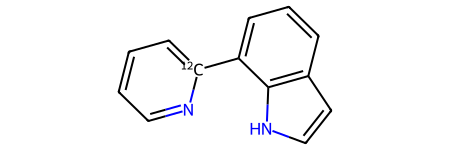

In [3]:
base = Chem.MolFromSmiles('c1cc[12c](-c2cccc3cc[nH]c23)nc1')
base

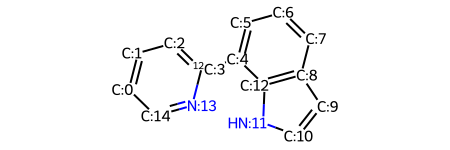

In [4]:
# get picture of atom ids
# Iterate over the atoms
atom_ids_expansion: dict = {}
for i, atom in enumerate(base.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
    # Store the atom index in a dict
    if atom_index in [14, 0, 1, 2]:
        atom_ids_expansion[atom_index] = True
    elif atom_index in [5, 6]:
        atom_ids_expansion[atom_index] = False
    else:
        atom_ids_expansion[atom_index] = None
base

In [5]:
atom_ids_expansion# store atom ids in dict

{0: True,
 1: True,
 2: True,
 3: None,
 4: None,
 5: False,
 6: False,
 7: None,
 8: None,
 9: None,
 10: None,
 11: None,
 12: None,
 13: None,
 14: True}

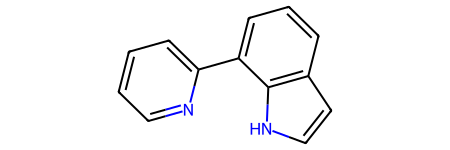

In [6]:
# how does a different SMILES result in different atom ids
base = Chem.MolFromSmiles('c1ccc(-c2cccc3cc[nH]c23)nc1')
base

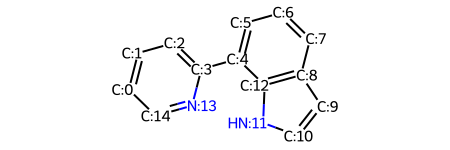

In [7]:
for i, atom in enumerate(base.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
base

In [8]:
# test coloring
from rdkit.Chem.Draw import rdMolDraw2D
drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)
drawer.DrawMolecule(base, 
                    highlightAtoms=[0, 1, 2, 14, 5, 6],
                    highlightAtomColors={0: (0, 1, 0), 1: (1, 0, 0), 2: (1, 0, 0), 14: (1, 0, 0), 5: (0, 1, 0), 6: (0, 1, 0)})
drawer.FinishDrawing()

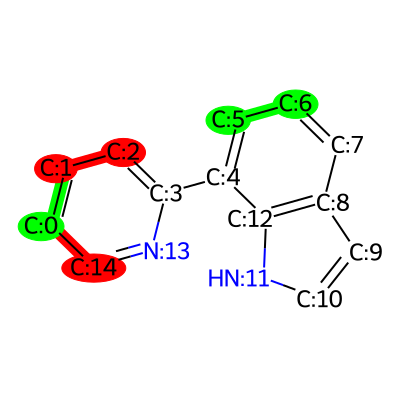

In [9]:
i = IPython.display.SVG(drawer.GetDrawingText())
display(i)

In [10]:
# save
with open('test.svg', 'w') as f:
    f.write(drawer.GetDrawingText())

In [11]:
# Load example products that have been expanded or not
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/one_step_warren_A71EV2A/KFKUHRDIQZWKPK-UHFFFAOYSA-N_Sp2-sp2_Suzuki_coupling_products_1of1.csv', index_col=0)
df

bad_expansion                     base_compound conformer  \
0               NaN  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   
1               NaN  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   
2             False  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   
3             False  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   
4             False  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   
...             ...                               ...       ...   
9995  non_mcs_match  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   
9996  non_mcs_match  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   
9997  non_mcs_match  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   
9998  non_mcs_match  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   
9999  non_mcs_match  KFKUHRDIQZWKPK-UHFFFAOYSA-N_base         A   

     expanded_on_atom_0 expanded_on_atom_1 expanded_on_atom_14  \
0                 False              False               False   
1                 False              False               False   
2                 False              False                True   
3                  True              False               False   
4                 False              False               False   
...                 ...                ...                 ...   
9995      non_mcs_match      non_mcs_match       non_mcs_match   
9996      non_mcs_match      non_mcs_match       non_mcs_match   
9997      non_mcs_match      non_mcs_match       non_mcs_match   
9998      non_mcs_match      non_mcs_match       non_mcs_match   
9999      non_mcs_match      non_mcs_match       non_mcs_match   

     expanded_on_atom_2 expanded_on_atom_5 expanded_on_atom_6 good_expansion  \
0                 False              False              False            NaN   
1                 False              False              False            NaN   
2                 False              False              False           True   
3                 False              False              False           True   
4                  True              False              False           True   
...                 ...                ...                ...            ...   
9995      non_mcs_match      non_mcs_match      non_mcs_match  non_mcs_match   
9996      non_mcs_match      non_mcs_match      non_mcs_match  non_mcs_match   
9997      non_mcs_match      non_mcs_match      non_mcs_match  non_mcs_match   
9998      non_mcs_match      non_mcs_match      non_mcs_match  non_mcs_match   
9999      non_mcs_match      non_mcs_match      non_mcs_match  non_mcs_match   

                                    name  num_atom_diff  \
0     KFKUHRDIQZWKPK-UHFFFAOYSA-N-base-A              0   
1        KFKUHRDIQZWKPK-UHFFFAOYSA-N-1-A              1   
2        KFKUHRDIQZWKPK-UHFFFAOYSA-N-2-A              1   
3        KFKUHRDIQZWKPK-UHFFFAOYSA-N-3-A              1   
4        KFKUHRDIQZWKPK-UHFFFAOYSA-N-4-A              1   
...                                  ...            ...   
9995  KFKUHRDIQZWKPK-UHFFFAOYSA-N-9995-A              9   
9996  KFKUHRDIQZWKPK-UHFFFAOYSA-N-9996-A              9   
9997  KFKUHRDIQZWKPK-UHFFFAOYSA-N-9997-A              9   
9998  KFKUHRDIQZWKPK-UHFFFAOYSA-N-9998-A              9   
9999  KFKUHRDIQZWKPK-UHFFFAOYSA-N-9999-A              9   

                                             r1_mol             r1_smiles  \
0     <rdkit.Chem.rdchem.Mol object at 0x177cc2680>        Br[12c]1ccccn1   
1     <rdkit.Chem.rdchem.Mol object at 0x177cc2680>        Br[12c]1ccccn1   
2     <rdkit.Chem.rdchem.Mol object at 0x177e7c680>         Nc1cccc(Br)n1   
3     <rdkit.Chem.rdchem.Mol object at 0x177e7c7c0>         Bc1ccc(Br)nc1   
4     <rdkit.Chem.rdchem.Mol object at 0x177e7c900>           Brc1ncccc1I   
...                                             ...                   ...   
9995  <rdkit.Chem.rdchem.Mol object at 0x177e7cb30>        Nc1cc(F)cnc1Br   
9996  <rdkit.Chem.rdchem.Mol object at 0x177e7cb30>        Nc1cc(F)cnc1Br   
9997  <rdkit.Chem.rdchem.Mol object at 0x177e

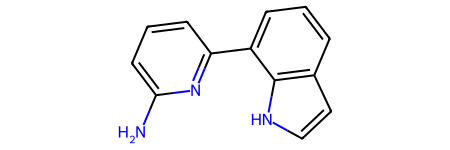

In [12]:
prod = df['smiles'][2]
prod = Chem.MolFromSmiles(prod)
prod

In [13]:
# get MCS between base and product
from rdkit.Chem import rdFMCS
mcs = rdFMCS.FindMCS([base, prod])
mcs

In [14]:
# from https://bertiewooster.github.io/2022/10/09/RDKit-find-and-highlight-the-maximum-common-substructure-between-molecules.html
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

def SmilesMCStoGridImage(smiles: list[str] or dict[str, str], align_substructure: bool = True, verbose: bool = False, **kwargs):
     """
     Convert a list (or dictionary) of SMILES strings to an RDKit grid image of the maximum common substructure (MCS) match between them

     :returns: RDKit grid image, and (if verbose=True) MCS SMARTS string and molecule, and list of molecules for input SMILES strings
     :rtype: RDKit grid image, and (if verbose=True) string, molecule, and list of molecules
     :param molecules: The SMARTS molecules to be compared and drawn
     :type molecules: List of (SMARTS) strings, or dictionary of (SMARTS) string: (legend) string pairs
     :param align_substructure: Whether to align the MCS substructures when plotting the molecules; default is True
     :type align_substructure: boolean
     :param verbose: Whether to return verbose output (MCS SMARTS string and molecule, and list of molecules for input SMILES strings); default is False so calling this function will present a grid image automatically
     :type verbose: boolean
     """
     mols = [Chem.MolFromSmiles(smile) for smile in smiles]
     res = rdFMCS.FindMCS(mols, **kwargs)
     mcs_smarts = res.smartsString
     mcs_mol = Chem.MolFromSmarts(res.smartsString)
     smarts = res.smartsString
     smart_mol = Chem.MolFromSmarts(smarts)
     smarts_and_mols = [smart_mol] + mols

     smarts_legend = "Max. substructure match"

     # If user supplies a dictionary, use the values as legend entries for molecules
     if isinstance(smiles, dict):
          mol_legends = [smiles[molecule] for molecule in smiles]
     else:
          mol_legends = ["" for mol in mols]

     legends =  [smarts_legend] + mol_legends
    
     matches = [""] + [mol.GetSubstructMatch(mcs_mol) for mol in mols]

     subms = [x for x in smarts_and_mols if x.HasSubstructMatch(mcs_mol)]

     Chem.Compute2DCoords(mcs_mol)

     if align_substructure:
          for m in subms:
               _ = Chem.GenerateDepictionMatching2DStructure(m, mcs_mol)

     drawing = Draw.MolsToGridImage(smarts_and_mols, highlightAtomLists=matches, legends=legends)

     if verbose:
          return drawing, mcs_smarts, mcs_mol, mols
     else:
          return drawing

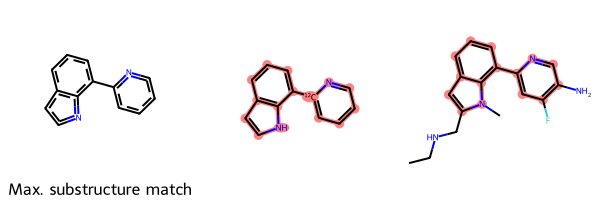

In [15]:
# display top 10 products
SmilesMCStoGridImage([df['smiles'][0],df['smiles'][9700]], verbose=True)[0]

In [16]:
SmilesMCStoGridImage(df['smiles'][:10], verbose=True)[1]

'[#6]1:[#6]:[#6]:[#6](:[#7]:[#6]:1)-[#6]1:[#6]:[#6]:[#6]:[#6]2:[#6]:1:[#7]:[#6]:[#6]:2'

In [17]:
mcs_mol = SmilesMCStoGridImage(df['smiles'][:10], verbose=True)[2]

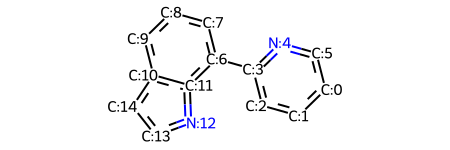

In [18]:
# display atom numbers in mcs_mol
for i, atom in enumerate(mcs_mol.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
mcs_mol

In [19]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

def SmilesMCStoGridImage(smiles: list[str] or dict[str, str], align_substructure: bool = True, verbose: bool = False, **kwargs):
    """
    Convert a list (or dictionary) of SMILES strings to an RDKit grid image of the maximum common substructure (MCS) match between them.
    Additionally, find atom ID mappings between the MCS and the original molecules.

    :returns: RDKit grid image, and (if verbose=True) MCS SMARTS string, molecule, list of molecules, and atom ID mappings
    :rtype: RDKit grid image, and (if verbose=True) string, molecule, list of molecules, and dict
    :param smiles: The SMILES strings to be compared and drawn
    :type smiles: List of strings, or dictionary of string: string pairs
    :param align_substructure: Whether to align the MCS substructures when plotting the molecules; default is True
    :type align_substructure: boolean
    :param verbose: Whether to return verbose output; default is False so calling this function will present a grid image automatically
    :type verbose: boolean
    """
    mols = [Chem.MolFromSmiles(smile) for smile in smiles]
    res = rdFMCS.FindMCS(mols, **kwargs)
    mcs_smarts = res.smartsString
    mcs_mol = Chem.MolFromSmarts(res.smartsString)

    # Find atom mappings
    atom_mappings = []
    for i, mol in enumerate(mols):
        match = mol.GetSubstructMatch(mcs_mol)
        if i == 0:
            base_mapping = {mol_idx: mcs_idx for mcs_idx, mol_idx in enumerate(match)}
        else:
            mapping = {mcs_idx: mol_idx for mcs_idx, mol_idx in enumerate(match)}
            atom_mappings.append(mapping)

    if align_substructure:
        Chem.Compute2DCoords(mcs_mol)
        for mol in mols:
            _ = Chem.GenerateDepictionMatching2DStructure(mol, mcs_mol)

    matches = [mol.GetSubstructMatch(mcs_mol) for mol in mols]
    drawing = Draw.MolsToGridImage([mcs_mol] + mols, highlightAtomLists=[[]] + matches)

    if verbose:
        return drawing, mcs_smarts, mcs_mol, mols, atom_mappings, base_mapping
    else:
        return drawing

# Example usage
smiles_list = df['smiles'][:2]  # Replace with your SMILES strings
image, mcs_smarts, mcs_mol, mols, atom_mappings, base_mapping = SmilesMCStoGridImage(smiles_list, verbose=True)

print('Base Mapping:', base_mapping)

# Print atom mappings for each molecule
for i, mapping in enumerate(atom_mappings):
    print(f"Molecule {i}: {mapping}")


Base Mapping: {0: 0, 1: 1, 2: 2, 3: 3, 13: 4, 14: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 12: 11, 11: 12, 10: 13, 9: 14}
Molecule 0: {0: 12, 1: 11, 2: 10, 3: 9, 4: 14, 5: 13, 6: 8, 7: 7, 8: 6, 9: 5, 10: 4, 11: 15, 12: 1, 13: 2, 14: 3}


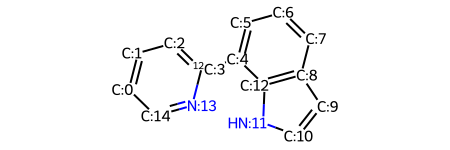

In [20]:
# color atoms in original
base = Chem.MolFromSmiles(df['smiles'][0])
for i, atom in enumerate(base.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
base

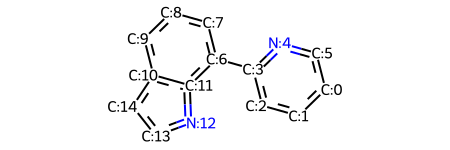

In [21]:
# display atom numbers in mcs_mol
for i, atom in enumerate(mcs_mol.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
mcs_mol

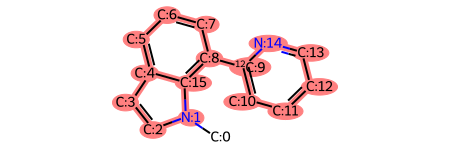

In [22]:
for i, atom in enumerate(mols[1].GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
mols[1]

In [23]:
df['smiles'][1]

'Cn1ccc2cccc(-[12c]3ccccn3)c21'

In [24]:
# check if atoms labeled in original have another atom attached
from rdkit import Chem
from rdkit.Chem import rdFMCS

def has_non_mcs_bond(mol_smiles, ref_smiles, atom_id):
    """
    Check if the specified atom in the given molecule has a bond that is not in the MCS with a reference molecule.

    :param mol_smiles: SMILES string of the molecule to check
    :param ref_smiles: SMILES string of the reference molecule
    :param atom_id: Atom ID to check in the given molecule
    :return: True if the atom has a non-MCS bond, False otherwise
    """
    mol = Chem.MolFromSmiles(mol_smiles)
    ref_mol = Chem.MolFromSmiles(ref_smiles)

    # Find MCS between mol and ref_mol
    mcs_res = rdFMCS.FindMCS([mol, ref_mol])
    mcs_mol = Chem.MolFromSmarts(mcs_res.smartsString)

    # Get atom mapping for the MCS in mol
    mcs_match = mol.GetSubstructMatch(mcs_mol)

    # Check if the atom_id is valid
    if atom_id >= mol.GetNumAtoms():
        raise ValueError("Invalid atom ID.")

    # Check bonds of the specified atom
    for bond in mol.GetAtomWithIdx(atom_id).GetBonds():
        # Get the indices of the bonded atoms
        begin_atom_idx = bond.GetBeginAtomIdx()
        end_atom_idx = bond.GetEndAtomIdx()
        print(begin_atom_idx, end_atom_idx)

        # Check if this bond is in the MCS
        if begin_atom_idx not in mcs_match or end_atom_idx not in mcs_match:
            # Bond is not in MCS
            return True

    # No non-MCS bonds found
    return False

# Example usage
mol_smiles =  'Cn1ccc2cccc(-[12c]3ccccn3)c21' # Replace with your molecule's SMILES
ref_smiles = 'c1cc[12c](-c2cccc3cc[nH]c23)nc1'   # Replace with the reference molecule's SMILES
atom_id = 11         # Replace with the atom ID you want to check

# Check if the atom has a non-MCS bond
result = has_non_mcs_bond(mol_smiles, ref_smiles, atom_id)
print(f"Atom {atom_id} has non-MCS bond: {result}")


10 11
11 12
Atom 11 has non-MCS bond: False


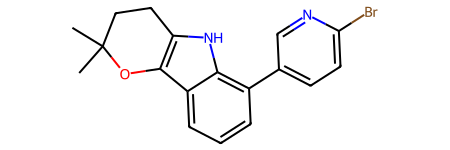

In [25]:
Chem.MolFromSmiles(df['smiles'][9500])

In [26]:
# change function to check list of atoms in base compound
# check if atoms labeled in original have another atom attached
from rdkit import Chem
from rdkit.Chem import rdFMCS

def has_non_mcs_bond(mol_smiles, ref_smiles, atom_id_ref):
    """
    Check if the specified atom in the given molecule has a bond that is not in the MCS with a reference molecule.

    :param mol_smiles: SMILES string of the molecule to check
    :param ref_smiles: SMILES string of the reference molecule
    :param atom_id: Atom ID to check in the given molecule
    :return: True if the atom has a non-MCS bond, False otherwise
    """
    mol = Chem.MolFromSmiles(mol_smiles)
    ref_mol = Chem.MolFromSmiles(ref_smiles)
    # Find MCS between mol and ref_mol
    mcs_res = rdFMCS.FindMCS([mol, ref_mol])
    mcs_mol = Chem.MolFromSmarts(mcs_res.smartsString)
    
    # Get atom mapping for the MCS in ref
    ref_match = {ref_idx: mcs_idx for mcs_idx, ref_idx in enumerate(ref_mol.GetSubstructMatch(mcs_mol))}
    # Get atom mapping for the MCS in mol
    mcs_match = mol.GetSubstructMatch(mcs_mol)
    
    # Find mcs atom id
    mcs_atom_id = ref_match[atom_id_ref]
    # Find atom id in mol to check from mcs atom id
    atom_id = mcs_match[mcs_atom_id]

    # Check if the atom_id is valid
    if atom_id >= mol.GetNumAtoms():
        raise ValueError("Invalid atom ID.")

    # Check bonds of the specified atom
    for bond in mol.GetAtomWithIdx(atom_id).GetBonds():
        # Get the indices of the bonded atoms
        begin_atom_idx = bond.GetBeginAtomIdx()
        end_atom_idx = bond.GetEndAtomIdx()
        print(begin_atom_idx, end_atom_idx)

        # Check if this bond is in the MCS
        if begin_atom_idx not in mcs_match or end_atom_idx not in mcs_match:
            # Bond is not in MCS
            return True

    # No non-MCS bonds found
    return False

# Example usage
mol_smiles =  df['smiles'][9500] # Replace with your molecule's SMILES
ref_smiles = 'c1cc[12c](-c2cccc3cc[nH]c23)nc1'   # Replace with the reference molecule's SMILES
atom_id = 0        # Replace with the atom ID you want to check in ref mol

# Check if the atom has a non-MCS bond
result = has_non_mcs_bond(mol_smiles, ref_smiles, atom_id)
print(f"Atom {atom_id} has non-MCS bond: {result}")


3 4
4 5
Atom 0 has non-MCS bond: False


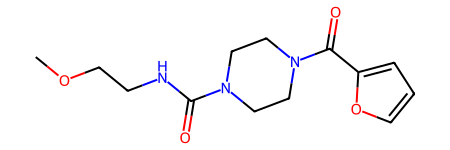

In [27]:
mol = Chem.MolFromSmiles('COCCNC(=O)N1CCN(C(=O)c2ccco2)CC1')
mol

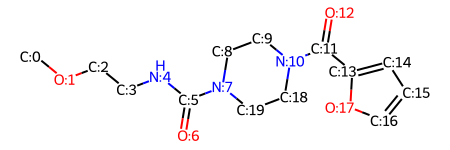

In [28]:
for i, atom in enumerate(mol.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
mol

In [29]:
from rdkit.Chem.Draw import rdMolDraw2D

# Assuming 'mol' is your molecule object
drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)

# Define the color for orange and green
orange = (1, 0.5, 0)  # RGB for orange
green = (0, 1, 0)     # RGB for green

# Highlight atoms
highlightAtoms = [0, 1, 2, 3, 4, 7, 8, 9, 10, 19, 18, 11, 12, 13, 14, 17]

# Set highlight colors for specific atoms
highlightAtomColors = {0: orange, 1: orange, 2: orange, 3: orange, 4: orange,
                       7: green, 8: green, 9: green, 10: green, 19: green, 
                       18: green, 11: green, 12: green, 13: green, 14: green, 17: green}

# Draw the molecule
drawer.DrawMolecule(mol, highlightAtoms=highlightAtoms, highlightAtomColors=highlightAtomColors)
drawer.FinishDrawing()


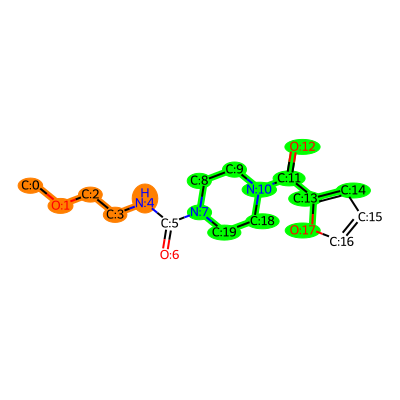

In [30]:
i = IPython.display.SVG(drawer.GetDrawingText())
display(i)

In [31]:
# save
with open('test.svg', 'w') as f:
    f.write(drawer.GetDrawingText())

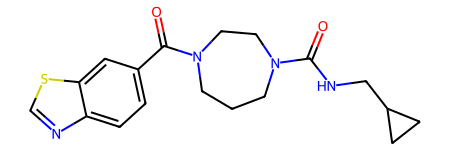

In [32]:
mol = Chem.MolFromSmiles('O=C(NCC1CC1)N1CCCN(C(=O)c2ccc3ncsc3c2)CC1')
mol

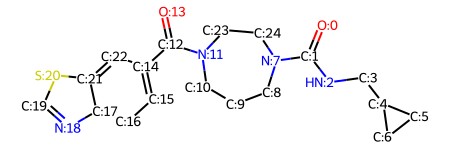

In [33]:
for i, atom in enumerate(mol.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
mol

In [34]:
from rdkit.Chem.Draw import rdMolDraw2D

# Assuming 'mol' is your molecule object
drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)

# Define the color for orange and green
orange = (1, 0.5, 0)  # RGB for orange
green = (0, 1, 0)     # RGB for green
# RGB color for red
red = (1, 0, 0)

# Highlight atoms
highlightAtoms = [0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 23, 24]

# Set highlight color for all atoms to red
highlightAtomColors = {atom_index: red for atom_index in highlightAtoms}

# Draw the molecule
drawer.DrawMolecule(mol, highlightAtoms=highlightAtoms, highlightAtomColors=highlightAtomColors)
drawer.FinishDrawing()


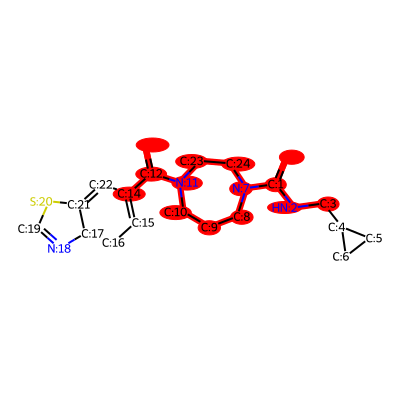

In [35]:
i = IPython.display.SVG(drawer.GetDrawingText())
display(i)

In [36]:
# save
with open('test_non_binding.svg', 'w') as f:
    f.write(drawer.GetDrawingText())

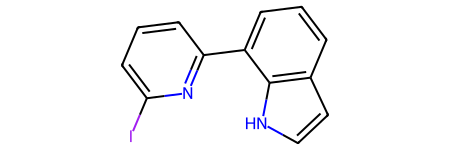

In [38]:
# two step
base = Chem.MolFromSmiles('Ic1cccc(-c2cccc3cc[nH]c23)n1')
base

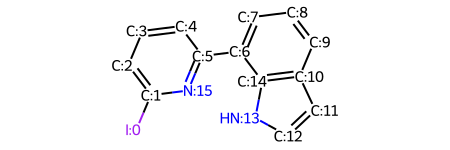

In [40]:
atom_ids_expansion: dict = {}
for i, atom in enumerate(base.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
base

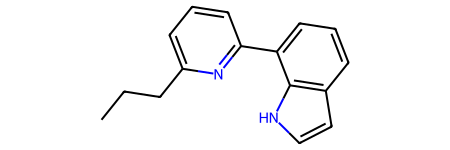

In [41]:
base = Chem.MolFromSmiles('CCCc1cccc(-c2cccc3cc[nH]c23)n1')
base

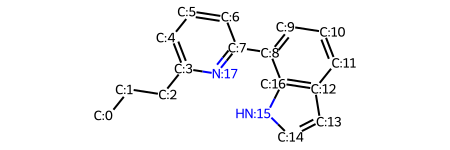

In [42]:
atom_ids_expansion: dict = {}
for i, atom in enumerate(base.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
base